In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd

from src.vital.fetchingstrategy.Sdk import Sdk
from src.vital.vitaldbgenerator import VitalDBGenerator, VitalFileOptions
import src.preprocessing.preprocessing as preprocessing


import tensorflow as tf
import matplotlib.pyplot as plt
import heartpy as hp
import neurokit2 as nk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
freq = 500

options = VitalFileOptions(
    ['SNUADC/ART'],
    1/freq
)

vitalDbGenerator = VitalDBGenerator(options, Sdk(), 2)

dataset = tf.data.Dataset.from_generator(
    lambda: vitalDbGenerator,
    output_signature=(
        tf.TensorSpec(shape=(None, 2), dtype=tf.float64)
    )
)

In [11]:
for vital_file in dataset.take(1):
    sample = vital_file

tf.print(sample)

[[0 nan]
 [0.002 nan]
 [0.004 nan]
 ...
 [11541.094000000001 -21.6466007232666]
 [11541.096 -2.8849399089813232]
 [11541.098 12.914400100708008]]


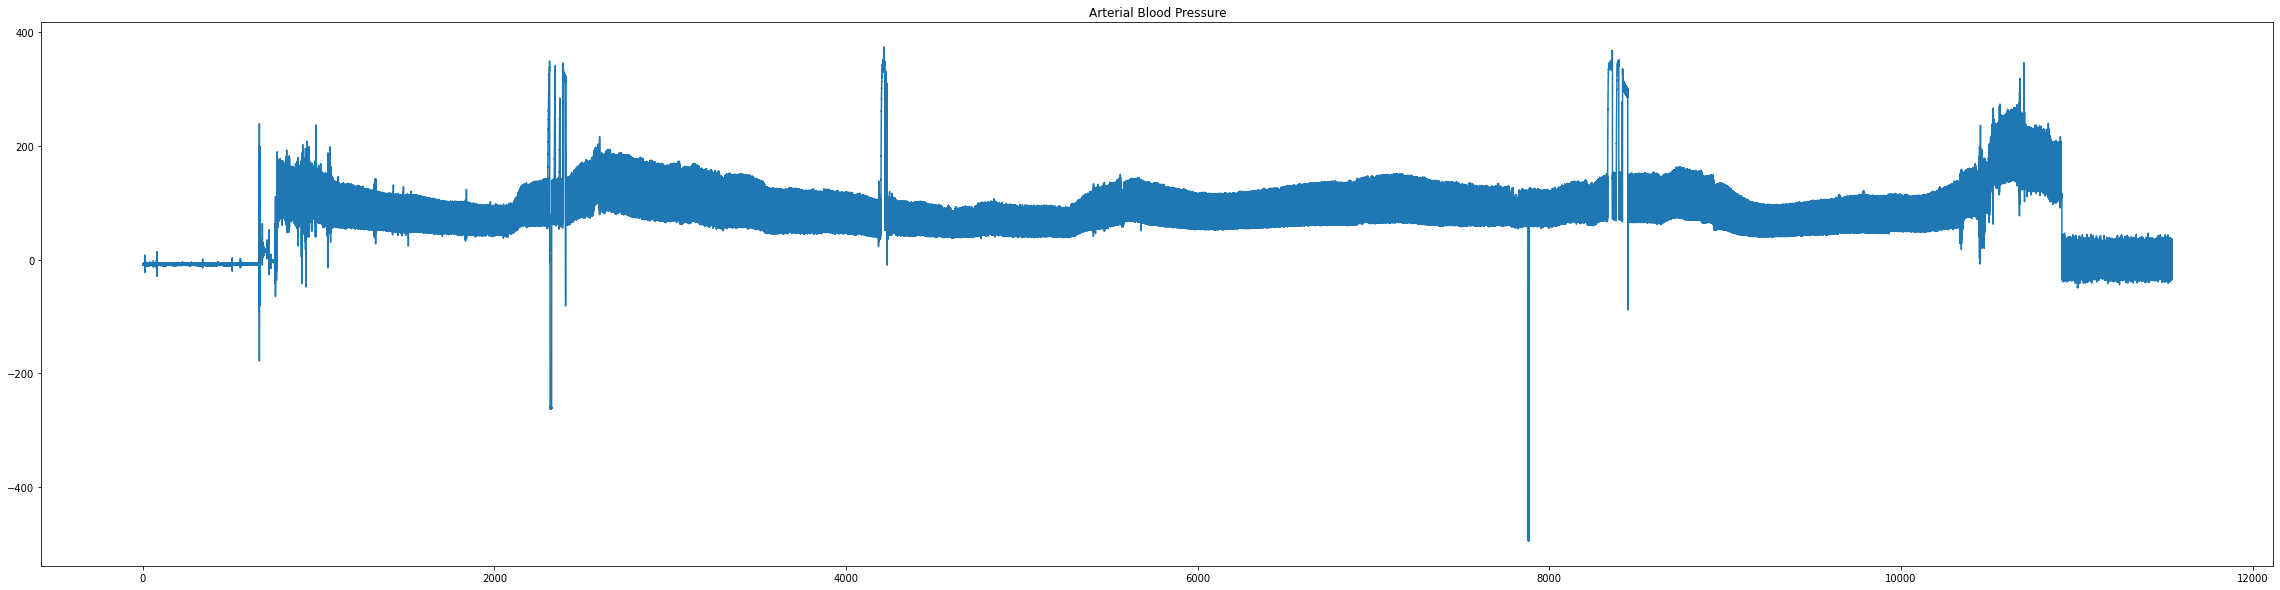

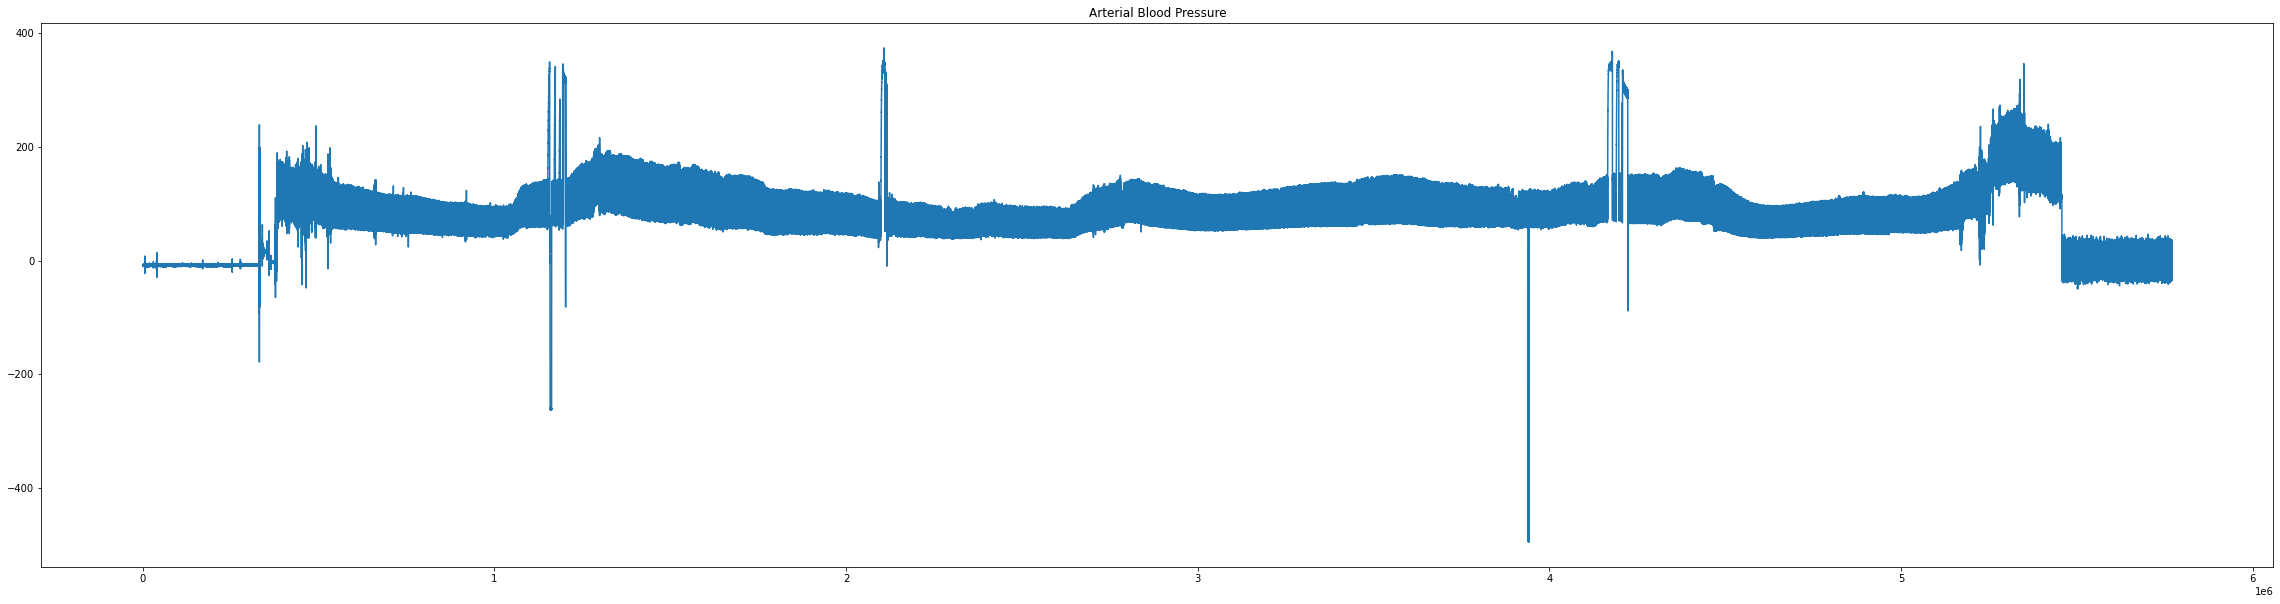

In [12]:
plt.figure(figsize=(40,10))
plt.title("Arterial Blood Pressure")
plt.plot(sample[:,0], sample[:,1])
plt.show()

plt.figure(figsize=(40,10))
plt.title("Arterial Blood Pressure")
plt.plot(sample[:,1])
plt.show()

Split windows

In [13]:
window_size = 8
step_size = 2

sample = preprocessing.extract_abp_track(sample.numpy())
sample_windows = preprocessing.abp_split_windows(sample, freq, window_size, step_size)
sample_windows = [preprocessing.abp_lowpass(x, freq) for x in sample_windows]

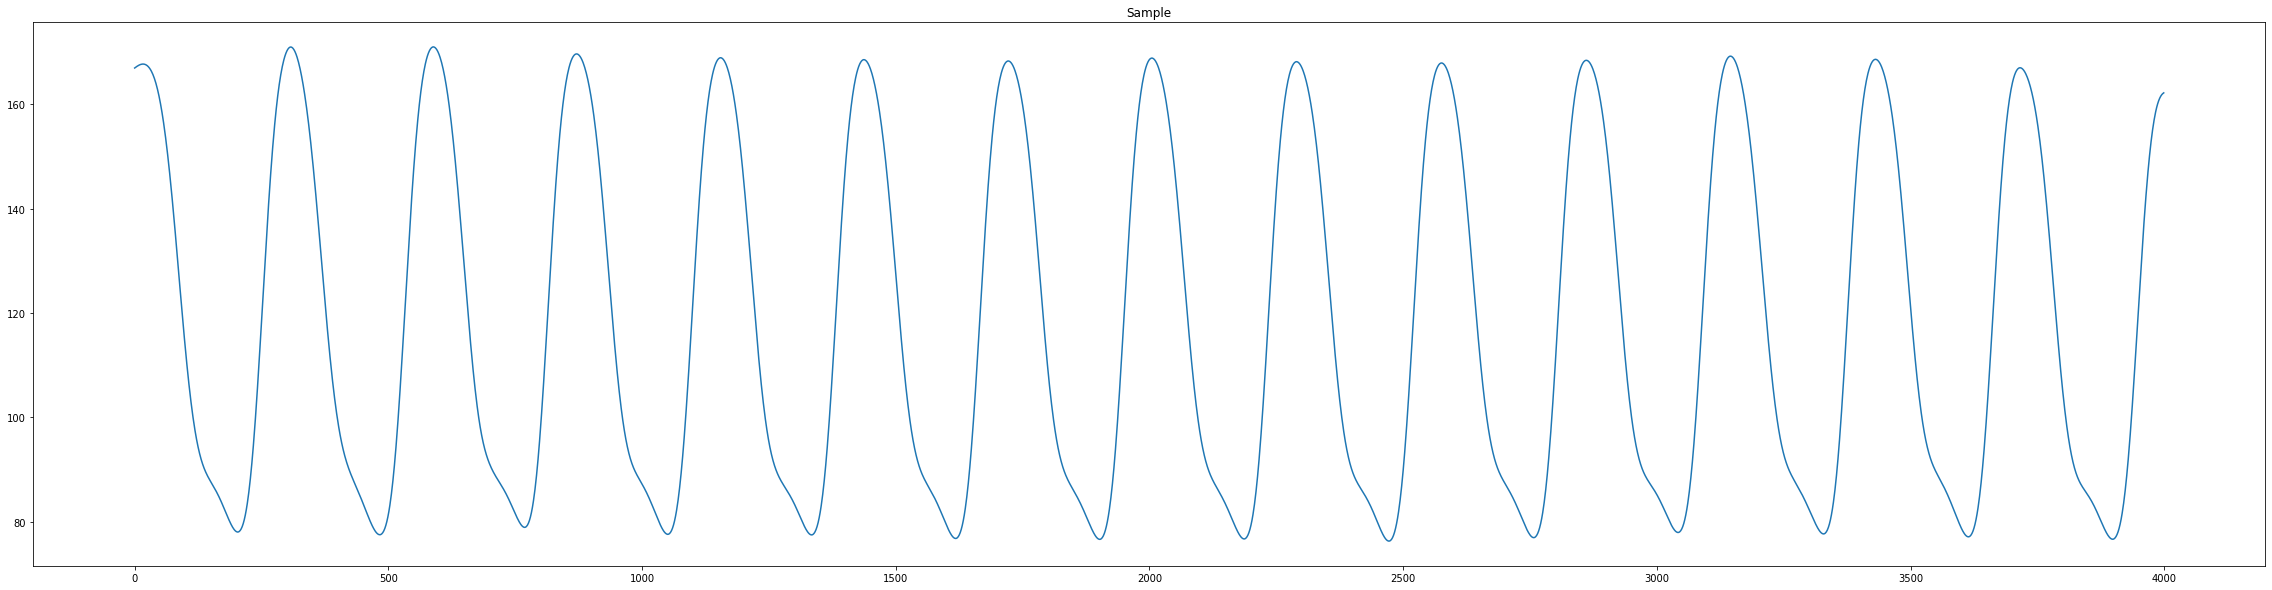

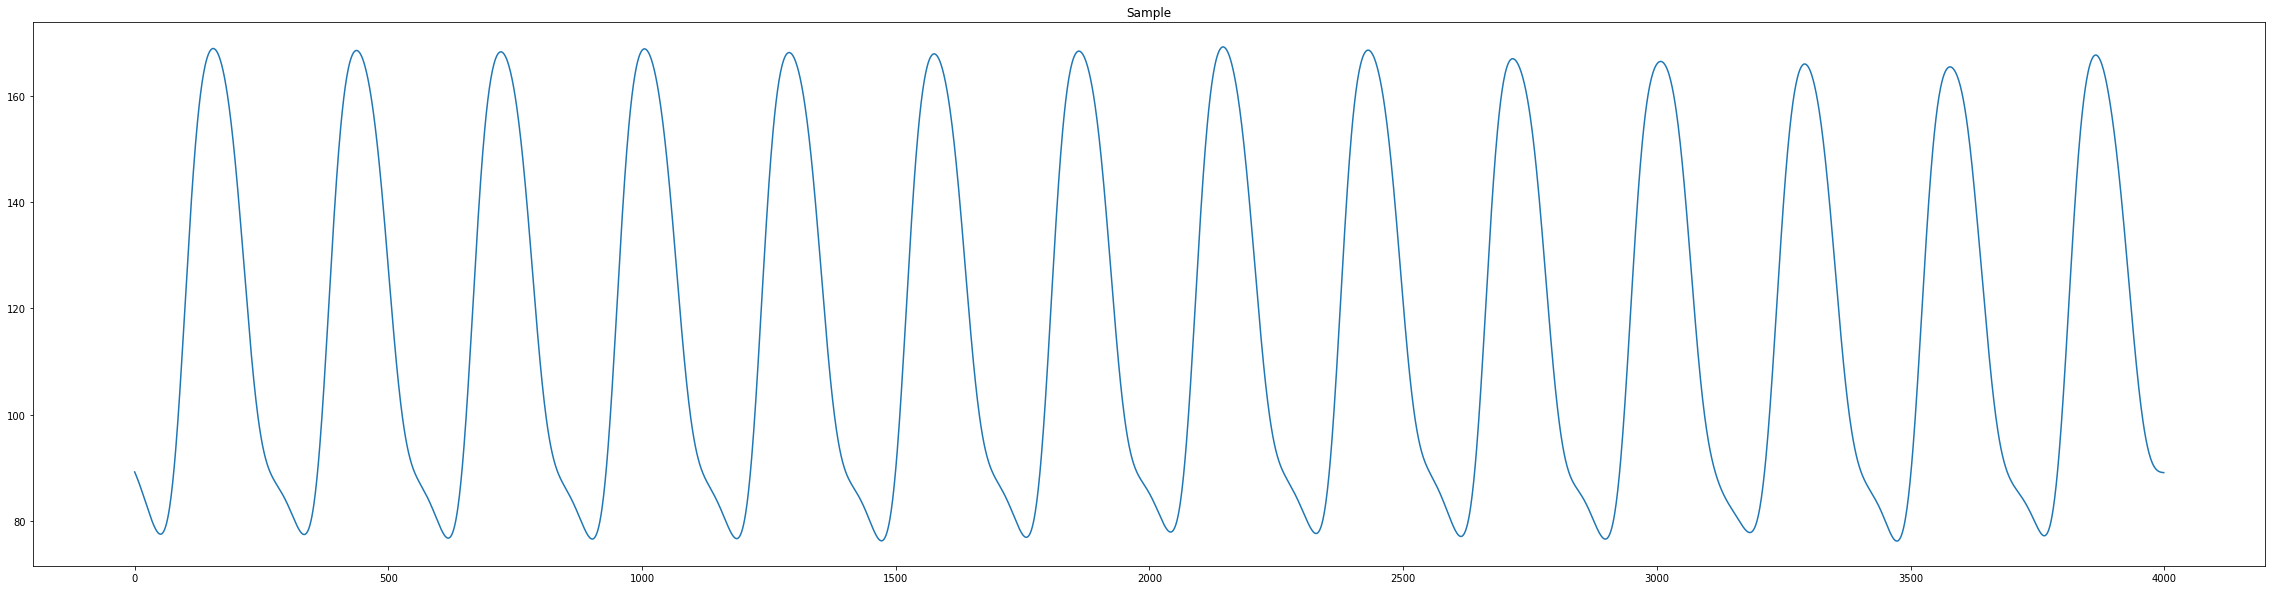

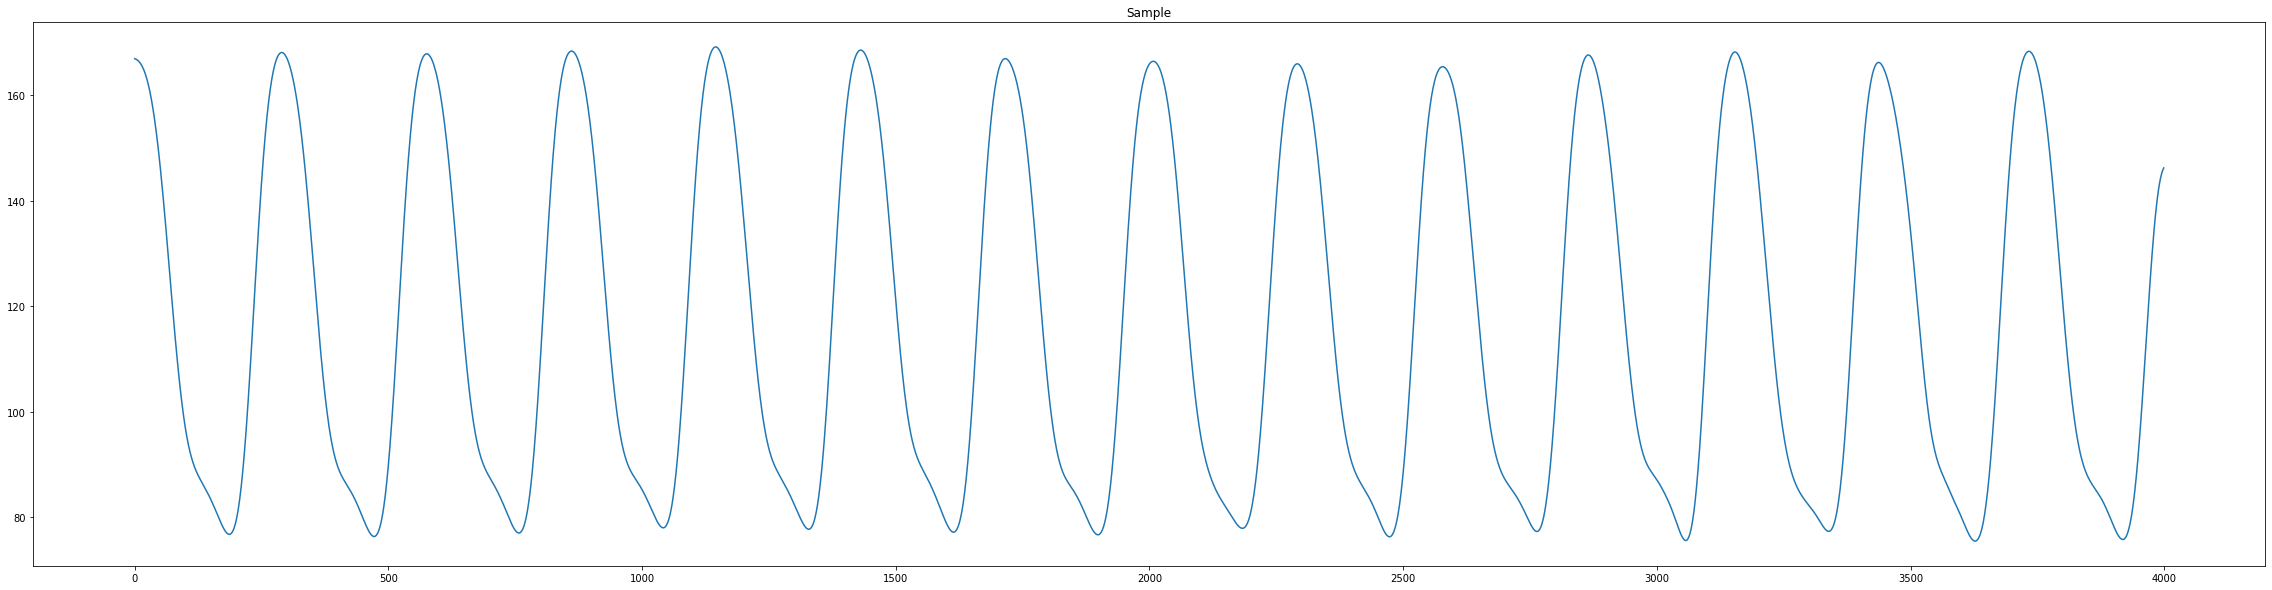

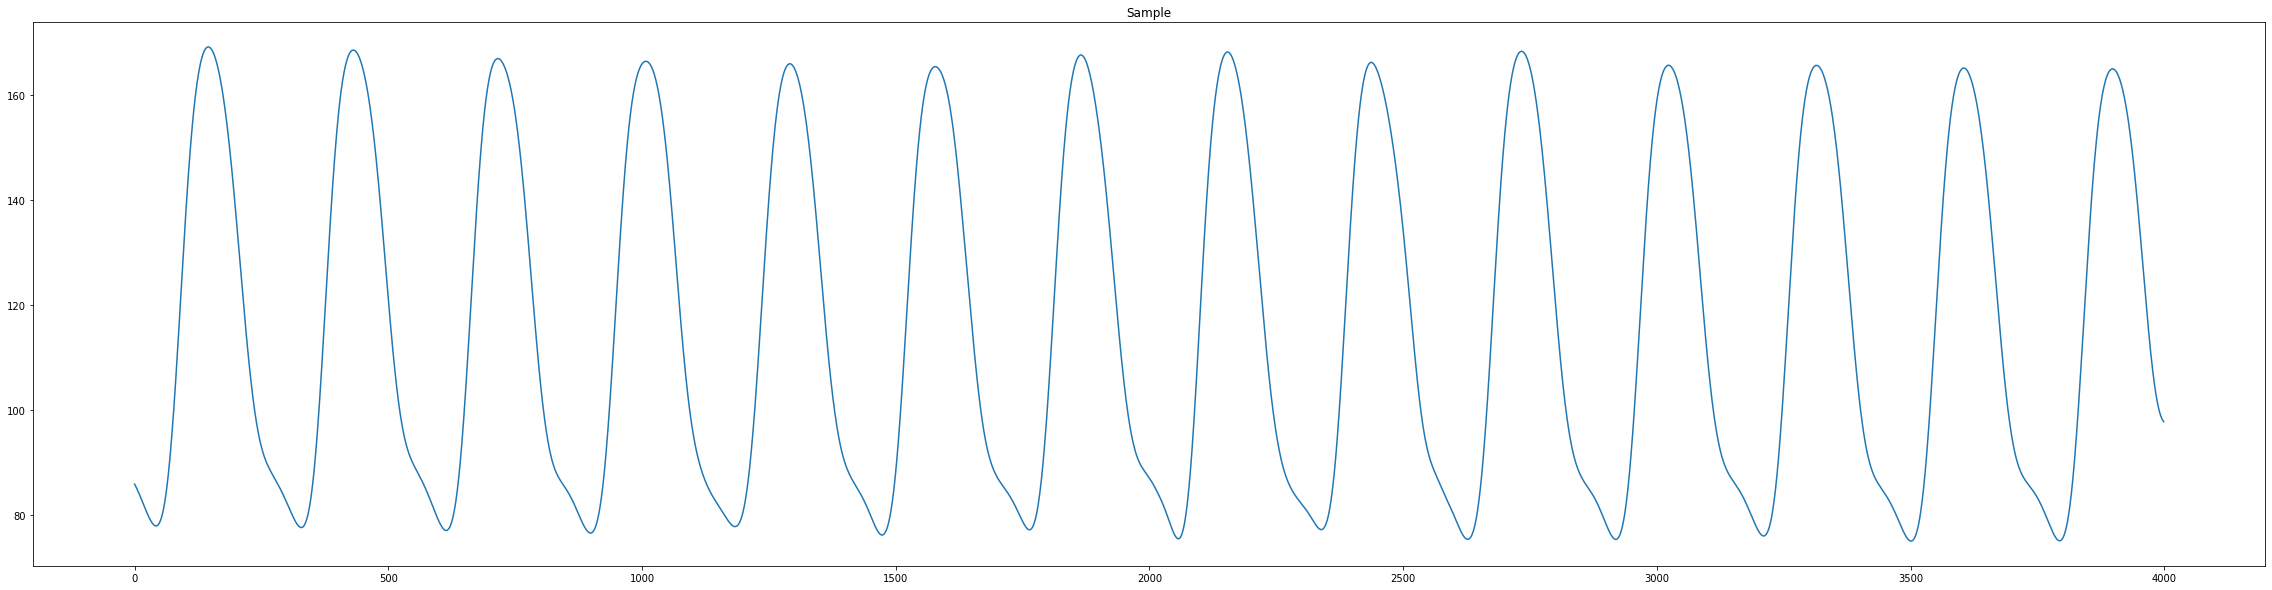

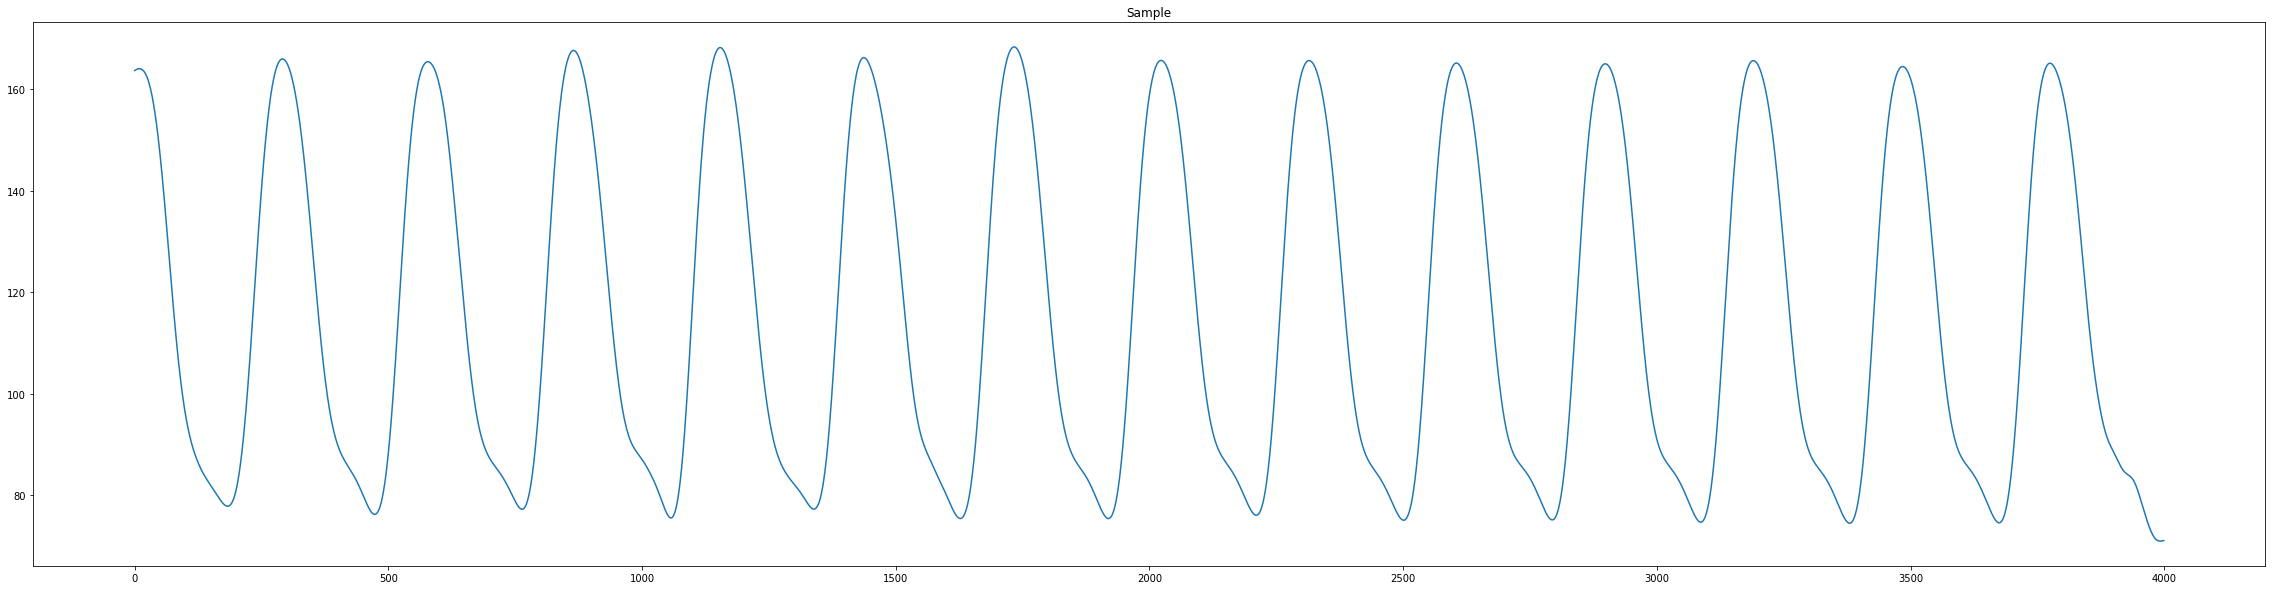

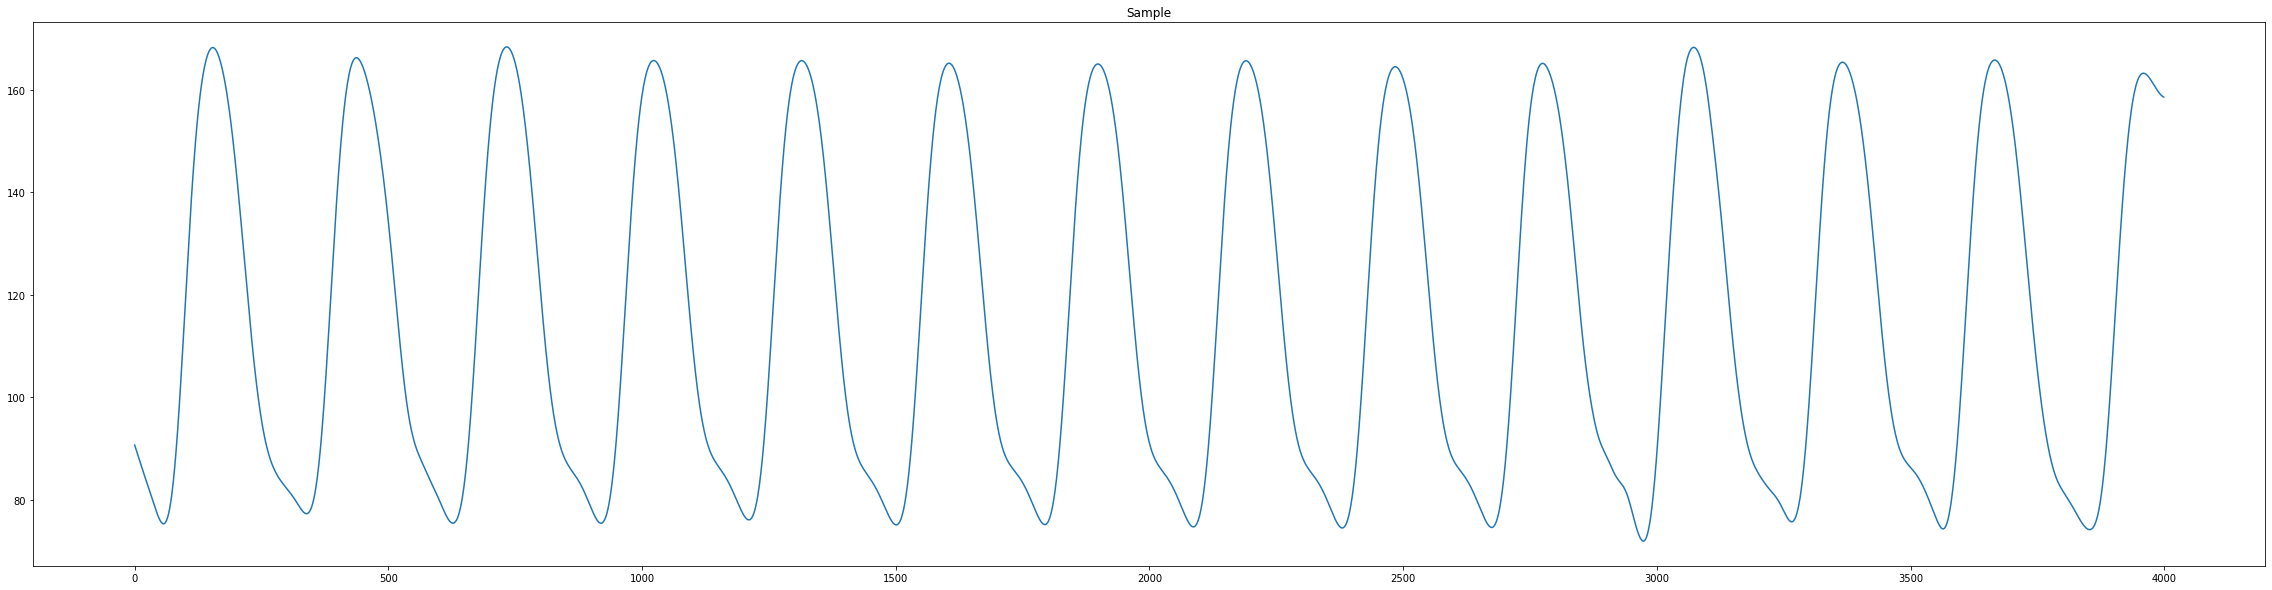

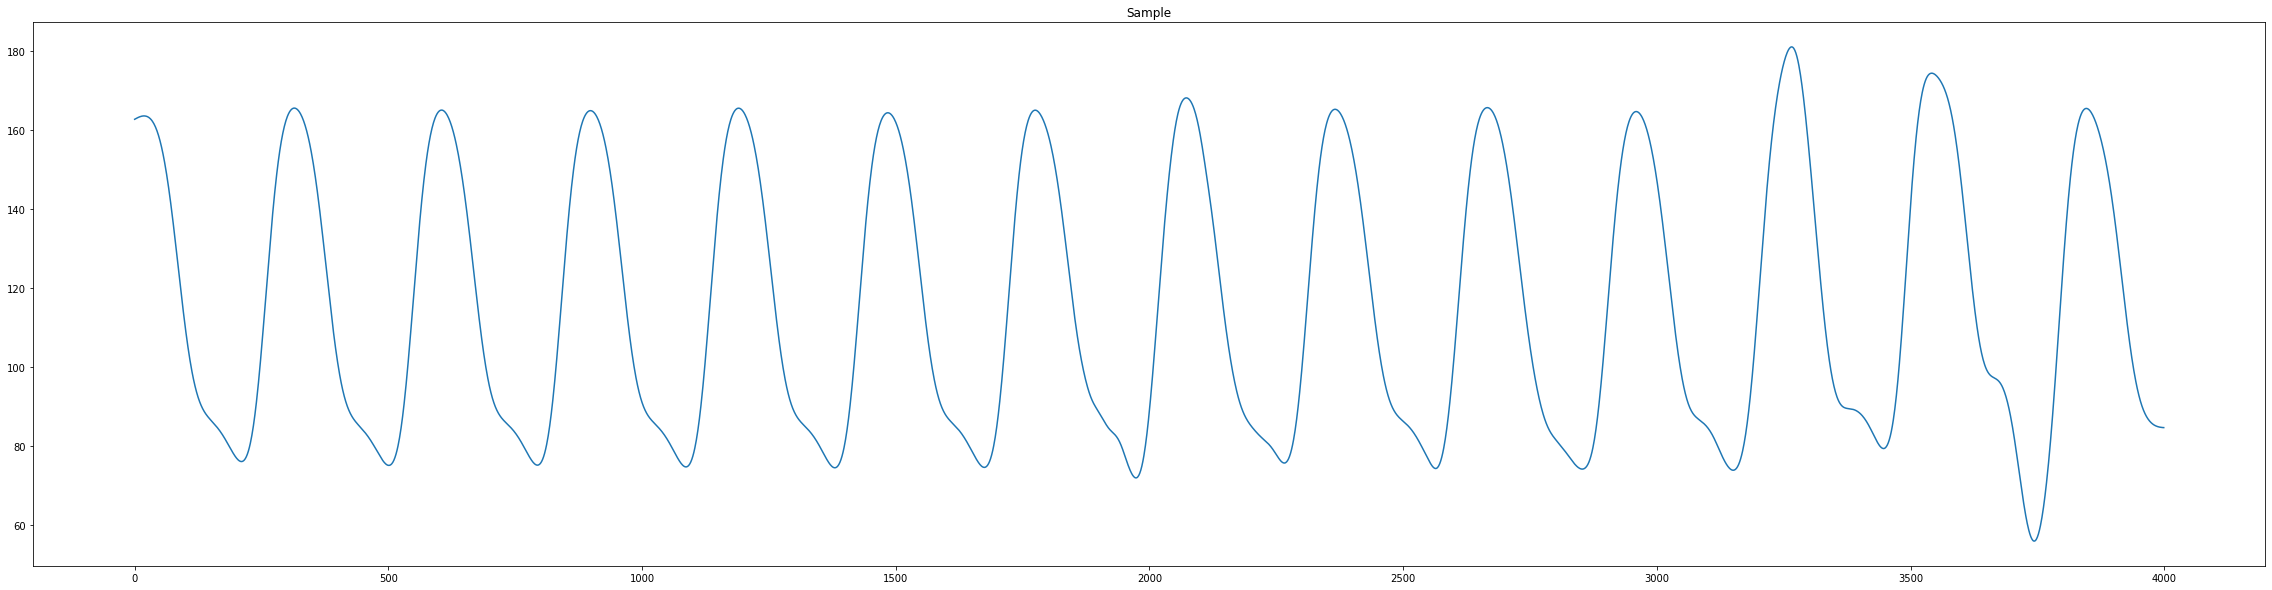

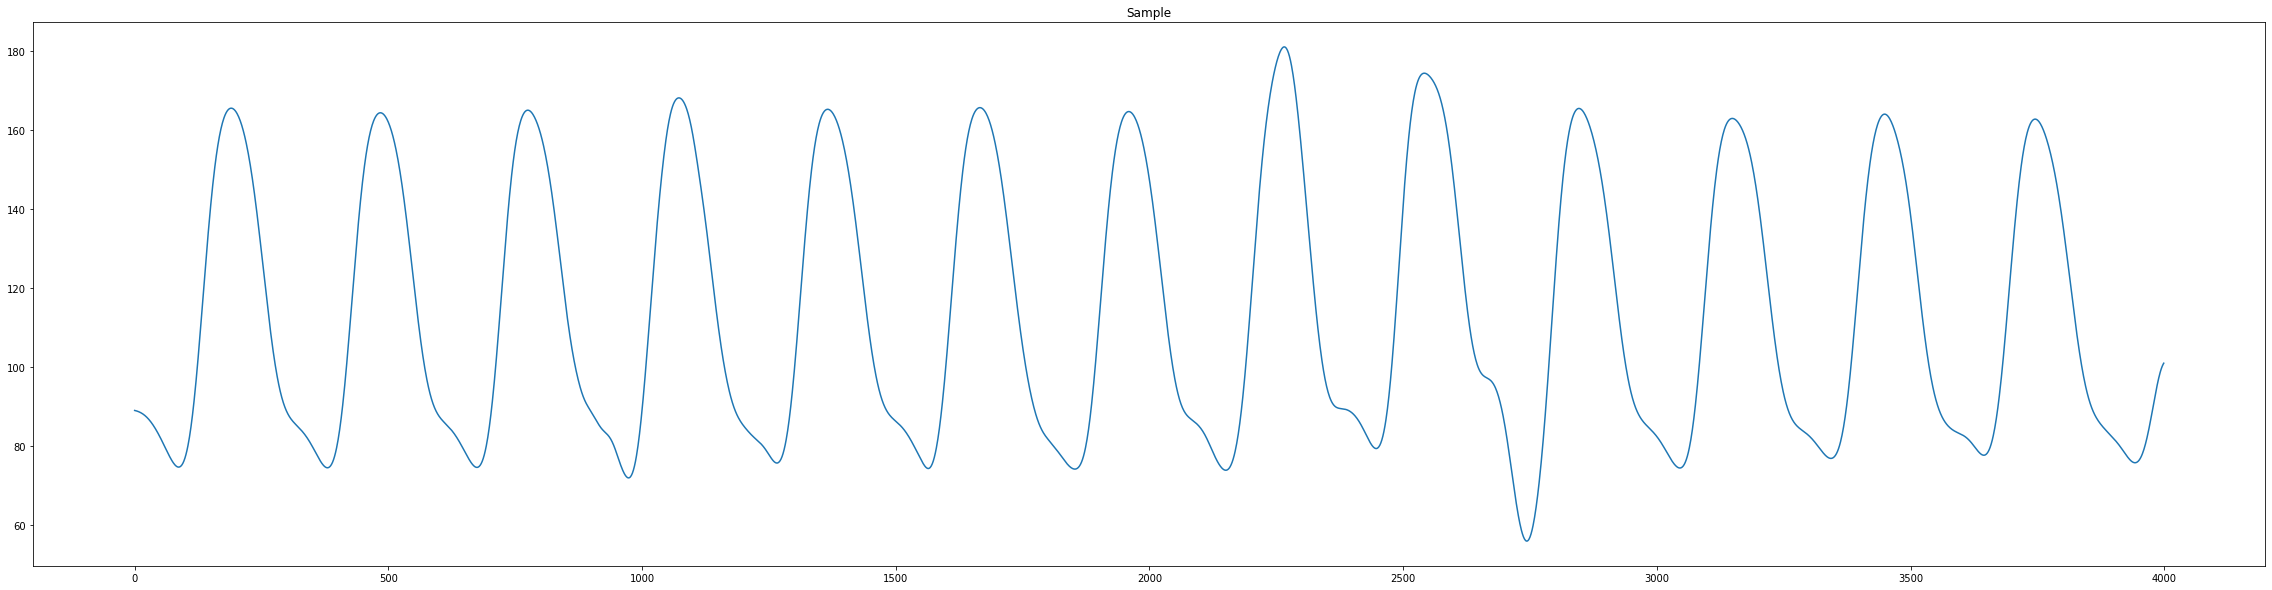

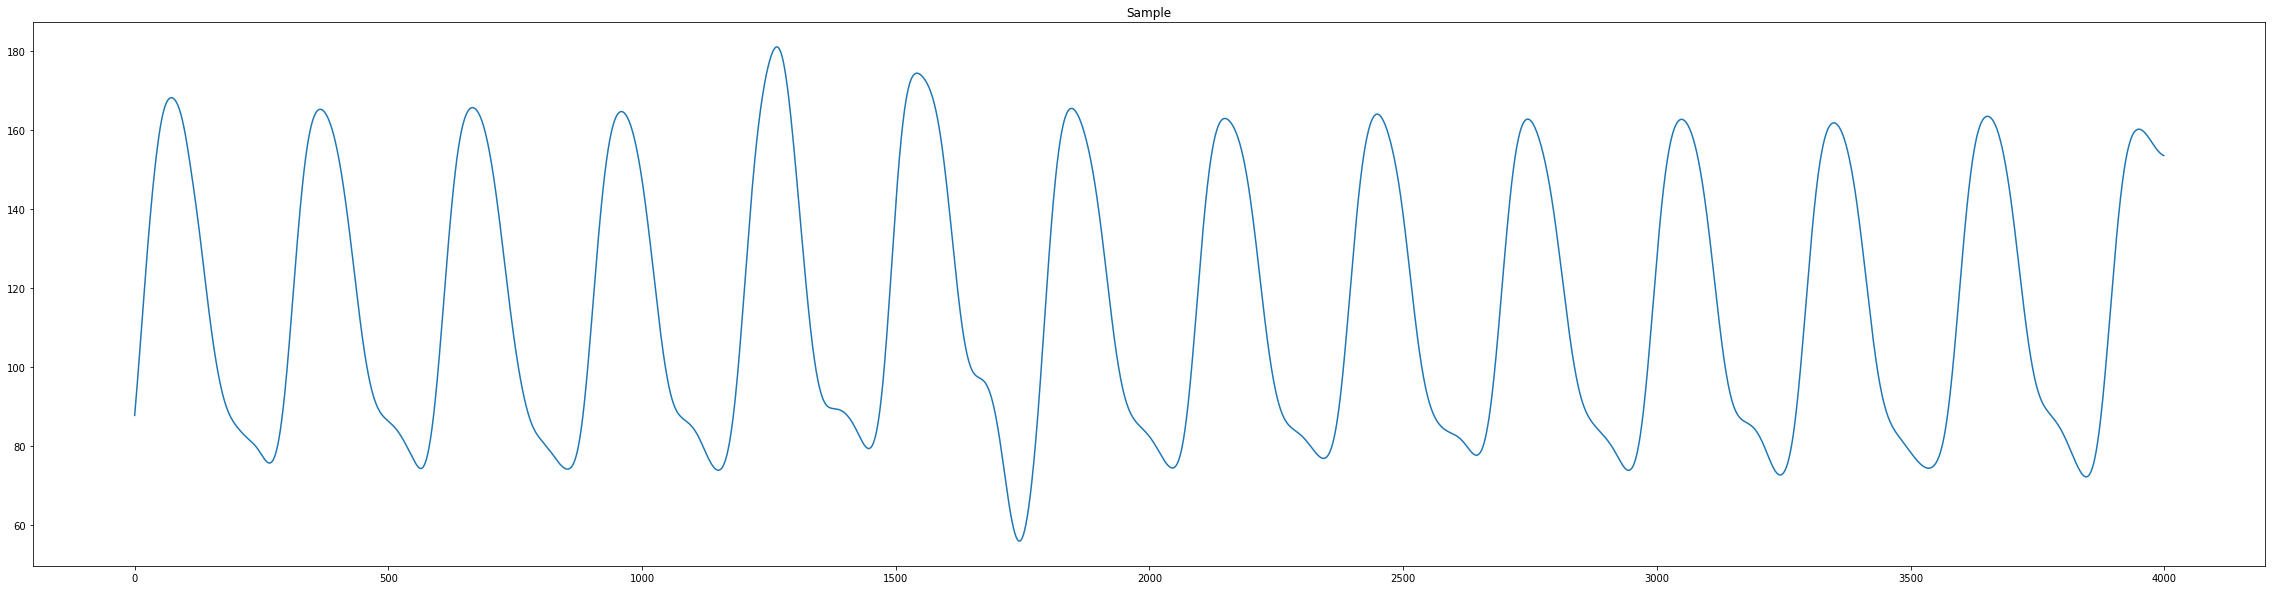

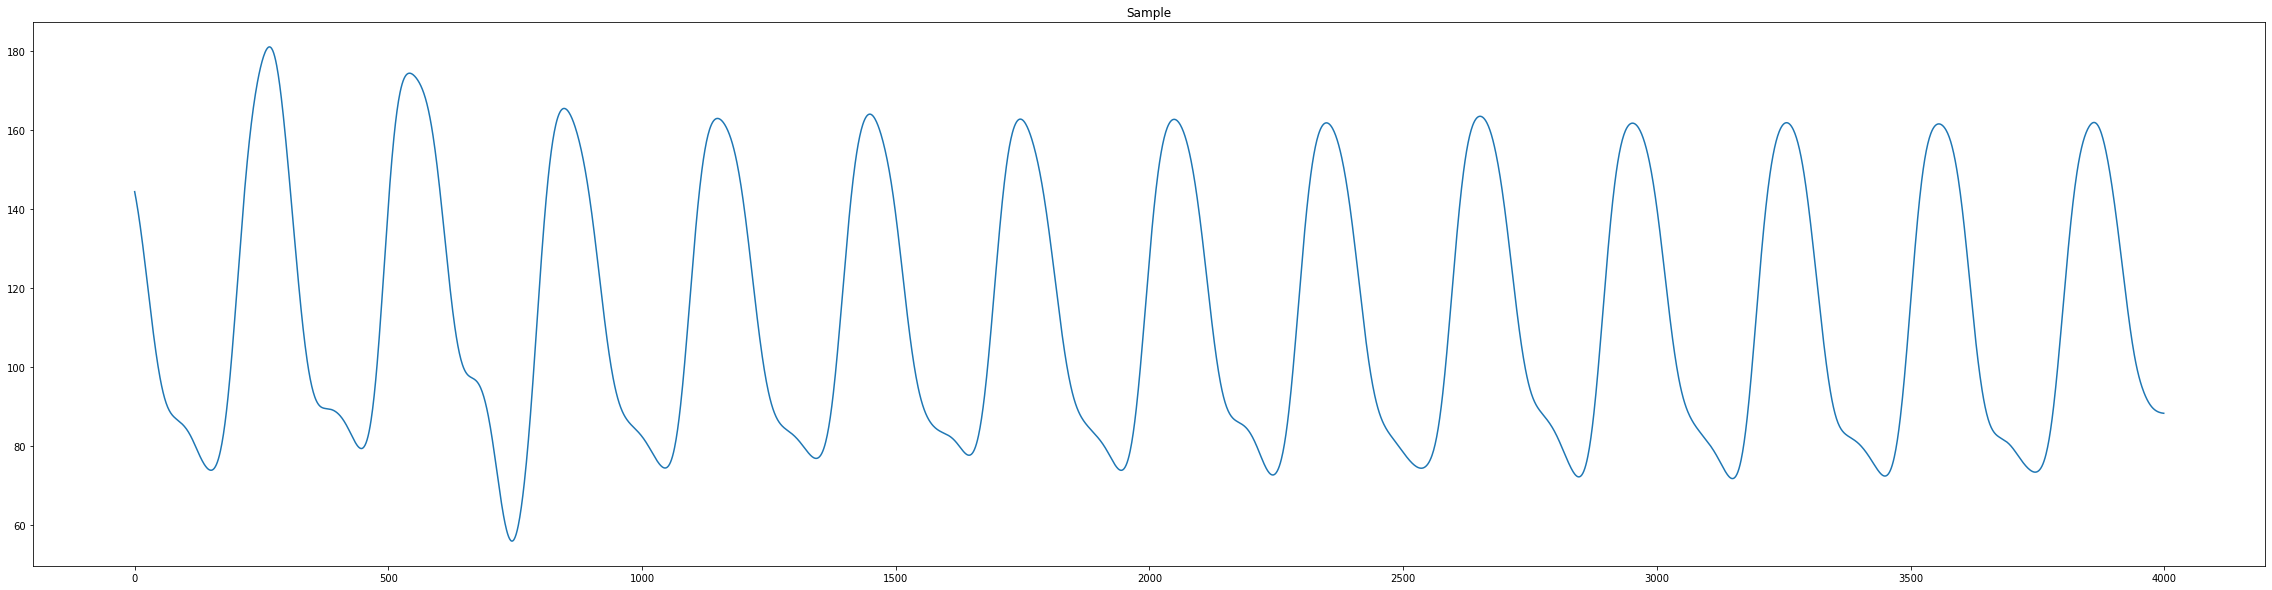

In [14]:
for i in range(400, 410):
    plt.figure(figsize=(40,10))
    plt.title("Sample")
    plt.plot(sample_windows[i])
    plt.show()

Band-pass filter

In [15]:
bp = preprocessing.extract_sbp_dbp_from_abp_window(sample_windows[100])

tf.print(bp)

(array([-8.94812779, -8.92018752, -8.89272756, ..., -8.22519379,
       -8.22856623, -8.23155822]),
 [-8.1017089532713022, -9.185103540432614])


In [16]:
def scale_window(window):
    return tf.keras.utils.normalize(
        window, axis=1,
    )

windows_scaled = tf.keras.utils.normalize(windows, axis=1)
windows_scaled

NameError: name 'windows' is not defined